In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
books = pd.read_csv('../data/Books.csv', delimiter=';')
ratings = pd.read_csv('../data/Ratings.csv', delimiter=';')
users = pd.read_csv('../data/Users.csv', delimiter=';')

C:\Users\Никита\AppData\Local\Temp\ipykernel_12056\1781307168.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv('../data/Users.csv', delimiter=';')


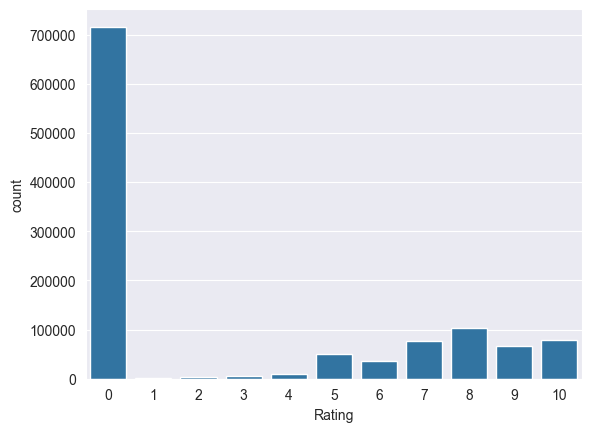

In [22]:
sns.countplot(x="Rating", data=ratings);


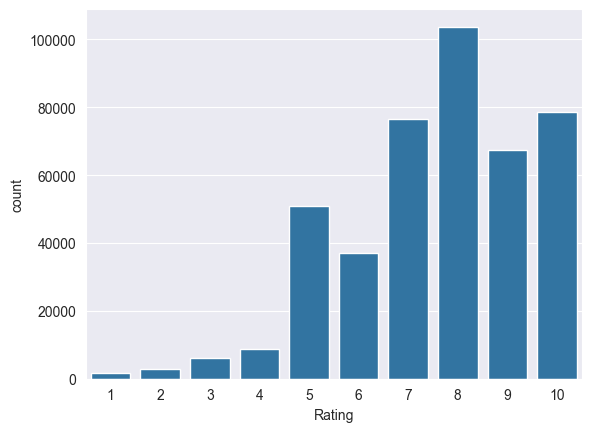

In [19]:
sns.countplot(x="Rating", data=ratings.query("Rating > 0"));

We have decided to keep only the ratings with the Ranking 1 or higher, since through the investigation of the dataset it seems that 0 rankings are implicit and 1-10 are explicit

<Axes: xlabel='Year', ylabel='Count'>

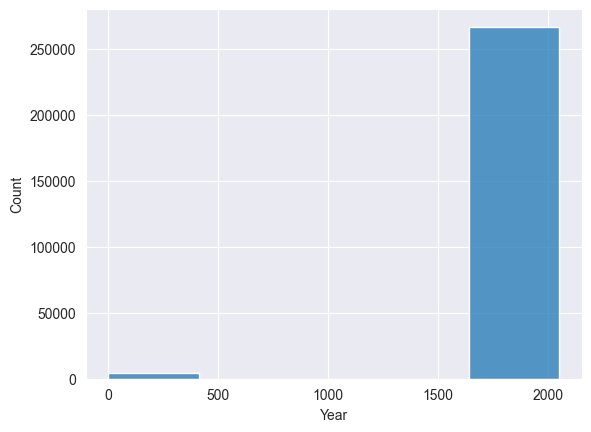

In [34]:
sns.histplot(x="Year", data=books, bins=5)

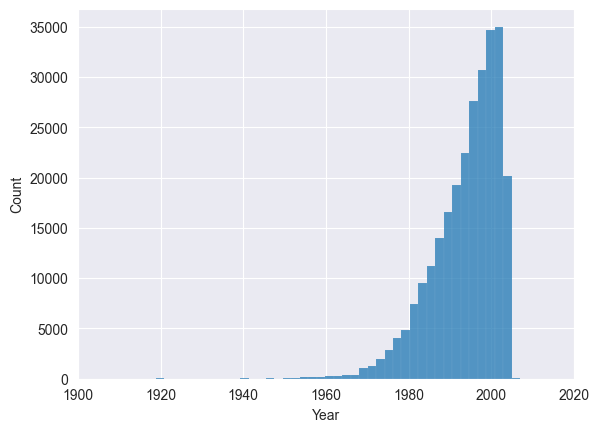

In [36]:
sns.histplot(x="Year", data=books, bins=1000)
plt.xlim(1900,2020);

We can see that there some very old publications and very little data after around 2002

In [30]:
books.query('Year < 1000')

,ISBN,Title,Author,Year,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270813,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270932,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271113,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271201,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [3]:
df_prep_step_1 = pd.merge(books, ratings.query("`Rating` > 0"), on='ISBN', how='inner')

df_prep_step_2 = pd.merge(df_prep_step_1, users, on='User-ID', how='inner')

In [4]:
df_prep = df_prep_step_2.drop(['Publisher'], axis=1)
df_isbn = df_prep.drop_duplicates()

In [5]:
df_isbn

,ISBN,Title,Author,Year,User-ID,Rating,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,11676,8,NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,67544,8,30
3,0002005018,Clara Callan,Richard Bruce Wright,2001,116866,9,NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,123629,9,NaN
...,...,...,...,...,...,...,...
363529,0679861548,Wolverine: Duty and Honor (X-Men Marvel Comics),Francine Hughes,1994,259901,7,NaN
363530,0816705739,"Good Luck, Bad Luck (Happy Times Adventures)",Rita Schlachter,1986,259901,10,NaN
363531,0822502763,Antonyms: Hot and Cold and Other Words That Ar...,Joan Hanson,1972,259901,10,NaN
363532,5550534274,Peter Pan Read-Along Book and Cassette,Walt Disney Productions,1989,259901,10,NaN


In [6]:
df_isbn['Original_NaN'] = df_isbn['Age'].isna()

# Convert 'Age' to numeric, turning non-numeric values into NaN
df_isbn['Age'] = pd.to_numeric(df_isbn['Age'], errors='coerce')

# Drop rows where 'Age' is NaN and were not originally NaN
df_isbn = df_isbn[~(users['Age'].isna() & ~df_isbn['Original_NaN'])]

# Drop the 'Original_NaN' column as it's no longer needed
df_isbn.drop(columns=['Original_NaN'], inplace=True)

C:\Users\Никита\AppData\Local\Temp\ipykernel_12056\701042267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isbn['Original_NaN'] = df_isbn['Age'].isna()
C:\Users\Никита\AppData\Local\Temp\ipykernel_12056\701042267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isbn['Age'] = pd.to_numeric(df_isbn['Age'], errors='coerce')
C:\Users\Никита\AppData\Local\Temp\ipykernel_12056\701042267.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_isbn = df_isbn[~(users['Ag

In [7]:
df_isbn['User-ID'] = pd.to_numeric(df_isbn['User-ID'], errors='coerce')

# Drop rows where 'Age' is NaN and were not originally NaN
df_isbn = df_isbn[~(df_isbn['User-ID'].isna())]

C:\Users\Никита\AppData\Local\Temp\ipykernel_12056\423264576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isbn['User-ID'] = pd.to_numeric(df_isbn['User-ID'], errors='coerce')


In [8]:
age_outliers = df_isbn.query("Age > 100 or Age < 6")

user_outliers = age_outliers["User-ID"].to_list()

In [9]:
# exclude age outliers
df_isbn = df_isbn[~df_isbn["User-ID"].isin(user_outliers)]

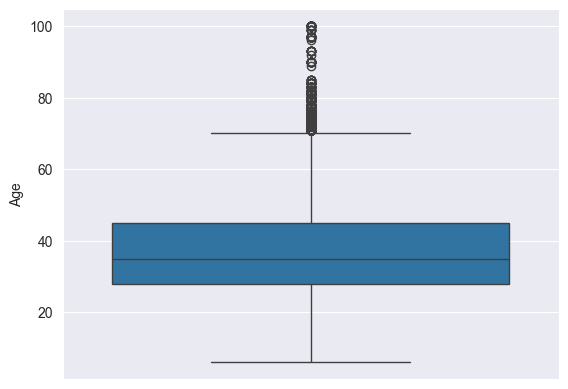

In [45]:
sns.boxplot(df_isbn["Age"]);

Having removed some corrupted data with the names of cities in the Age column, we can clearly see that there are some huge outliers aging 70 and beyond

In [10]:
df_isbn

,ISBN,Title,Author,Year,User-ID,Rating,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,11676,8,NaN
3,0002005018,Clara Callan,Richard Bruce Wright,2001,116866,9,NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,123629,9,NaN
5,0002005018,Clara Callan,Richard Bruce Wright,2001,200273,8,NaN
...,...,...,...,...,...,...,...
363529,0679861548,Wolverine: Duty and Honor (X-Men Marvel Comics),Francine Hughes,1994,259901,7,NaN
363530,0816705739,"Good Luck, Bad Luck (Happy Times Adventures)",Rita Schlachter,1986,259901,10,NaN
363531,0822502763,Antonyms: Hot and Cold and Other Words That Ar...,Joan Hanson,1972,259901,10,NaN
363532,5550534274,Peter Pan Read-Along Book and Cassette,Walt Disney Productions,1989,259901,10,NaN


In [12]:
y = df_isbn['Rating']
X = df_isbn.drop('Rating', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [14]:
X_train

,ISBN,Title,Author,Year,User-ID,Age
168822,2846260346,ZÃ?Â©ro tuÃ?Â©s,RÃ?Â©gis De Sa Moreira,2002,253852,27.0
223702,1883523184,The Activist's Daughter (Coming of Age Series),Ellyn Bache,1997,68555,NaN
161040,006051406X,Molly Moon's Incredible Book of Hypnotism (Mol...,Georgia Byng,2003,143218,13.0
9137,0060173289,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,86189,NaN
216012,0679772669,In the Skin of a Lion: A Novel,Michael Ondaatje,1997,151139,NaN
...,...,...,...,...,...,...
165047,0446400998,Skeleton's Knee (Joe Gunther Mysteries (Paperb...,Archer Mayor,1994,30607,NaN
337012,0465006493,The Mythic Past: Biblical Archaeology and the ...,Thomas L. Thompson,2000,224349,23.0
181859,0761104844,"1,000 Places to See Before You Die",Patricia Schultz,2003,224203,NaN
202379,0224051709,Amsterdam,Ian McEwan,1998,51449,26.0
